In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
all_jp = pref.groupby(["日付"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]

In [5]:
all_jp["weekday"] = all_jp["日付"].dt.weekday

## 移動平均

In [6]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp["死者数移動平均7"] = all_jp["各地の死者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7,死者数移動平均7
477,2021-05-07,6031,148,4,4987.571429,73.714286
478,2021-05-08,7230,86,5,5169.000000,74.142857
479,2021-05-09,6484,65,6,5255.285714,74.714286
480,2021-05-10,4927,71,0,5323.000000,77.857143
481,2021-05-11,6238,113,1,5615.428571,86.857143


## 曜日別陽性者集計

In [7]:
all_jp_week_mean = all_jp.groupby(["weekday"]).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_on="weekday", right_index=True, how="left")
all_jp_week_mean


,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
weekday,,,
0,947.391304,21.072464,月
1,1279.159420,27.289855,火
2,1413.882353,25.617647,水
3,1511.347826,23.695652,木
4,1479.869565,26.420290,金
5,1534.768116,20.942029,土
6,1273.289855,16.072464,日


In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


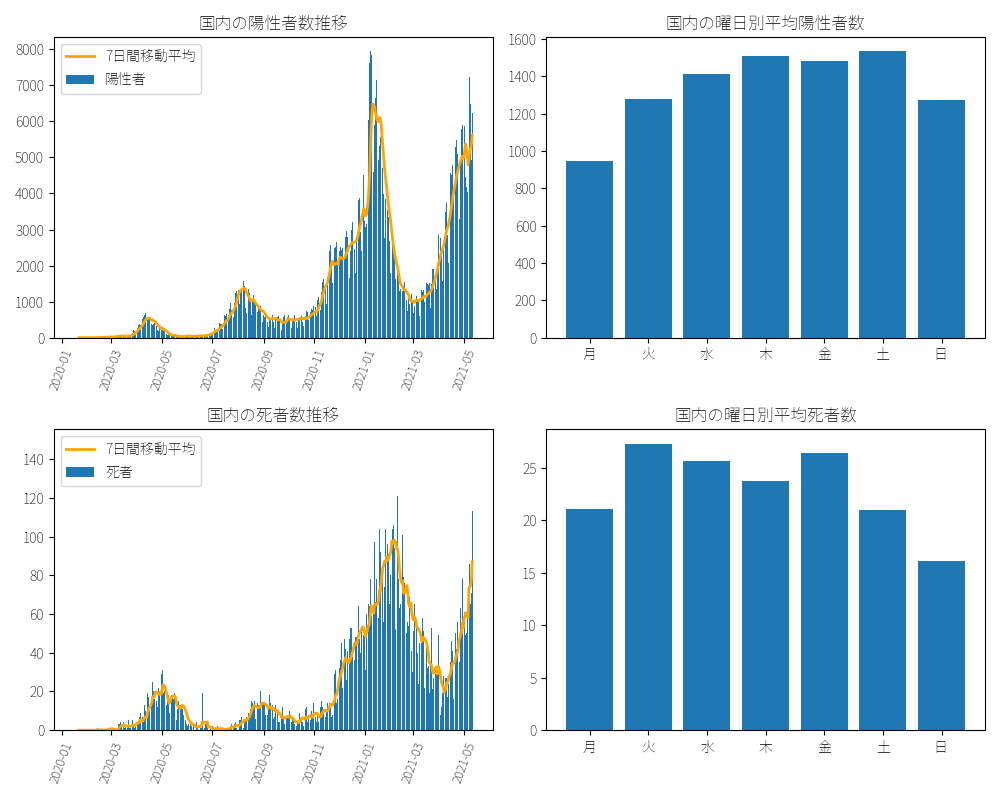

<BarContainer object of 7 artists>

In [9]:
#fig = plt.figure(figsize=(10,8))
fig, ax = plt.subplots(2,2,figsize=(10,8),tight_layout=True)
p_ax = ax[0,0]
p_ax.set_title("国内の陽性者数推移")
p_ax.bar(all_jp["日付"],all_jp["各地の感染者数_1日ごとの発表数"],label="陽性者")
p_ax.plot_date(all_jp["日付"],all_jp["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
p_ax.tick_params(axis="x",rotation=70, labelsize=9)
p_ax.legend()
d_ax = ax[1,0]
d_ax.set_title("国内の死者数推移")
d_ax.bar(all_jp["日付"],all_jp["各地の死者数_1日ごとの発表数"],label="死者")
d_ax.plot_date(all_jp["日付"],all_jp["死者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
d_ax.tick_params(axis="x",rotation=70, labelsize=9)
d_ax.legend()

wp_ax = ax[0,1]
wp_ax.set_title("国内の曜日別平均陽性者数")
wp_ax.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
wd_ax = ax[1,1]
wd_ax.set_title("国内の曜日別平均死者数")
wd_ax.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])



## 直近の推移

In [10]:
all_jp_latest = all_jp.loc[all_jp["日付"]>="2021-03-01"]
all_jp_latest.head()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7,死者数移動平均7
410,2021-03-01,684,51,0,1000.714286,57.000000
411,2021-03-02,887,65,1,973.285714,58.571429
412,2021-03-03,1240,63,2,1019.000000,57.714286
413,2021-03-04,1167,67,3,1032.142857,56.714286
414,2021-03-05,1146,55,4,1046.428571,53.142857


<IPython.core.display.Javascript object>


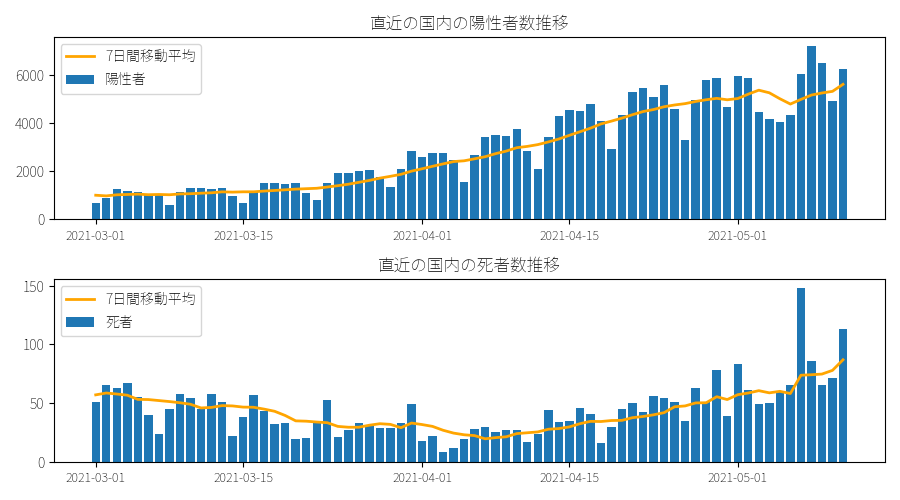

In [11]:
fig, ax = plt.subplots(2,1,figsize=(9,5),tight_layout=True)
p_ax = ax[0]
p_ax.set_title("直近の国内の陽性者数推移")
p_ax.bar(all_jp_latest["日付"],all_jp_latest["各地の感染者数_1日ごとの発表数"],label="陽性者")
p_ax.plot_date(all_jp_latest["日付"],all_jp_latest["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
p_ax.tick_params(axis="x",labelsize=9)
p_ax.legend()

d_ax = ax[1]
d_ax.set_title("直近の国内の死者数推移")
d_ax.bar(all_jp_latest["日付"],all_jp_latest["各地の死者数_1日ごとの発表数"],label="死者")
d_ax.plot_date(all_jp_latest["日付"],all_jp_latest["死者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
d_ax.tick_params(axis="x", labelsize=9)
d_ax.legend()
